In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import torch
from torchvision import datasets, models, transforms
import torch.nn as nn
from torch.nn import functional as F
import torch.optim as optim
import torchvision

from PIL import Image

In [20]:
input_path = "/content/drive/MyDrive/machine learning projects/training set/monkey pox/Fold1/Fold1/Fold1/"

In [21]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

data_transforms = {
    'train':
    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize
    ]),
    'validation':
    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        normalize
    ]),
    'test':
    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        normalize
    ]),
}

image_datasets = {
    'train': 
    datasets.ImageFolder(input_path + 'train', data_transforms['train']),
    'validation': 
    datasets.ImageFolder(input_path + 'validation', data_transforms['validation'])
}

dataloaders = {
    'train':
    torch.utils.data.DataLoader(image_datasets['train'],
                                batch_size=32,
                                shuffle=True,
                                num_workers=0),  # for Kaggle
    'validation':
    torch.utils.data.DataLoader(image_datasets['validation'],
                                batch_size=32,
                                shuffle=False,
                                num_workers=0)  # for Kaggle
}

In [22]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

device(type='cuda', index=0)

In [23]:
model = models.resnet101(pretrained=True).to(device)
    
for param in model.parameters():
    param.requires_grad = False   
    
model.fc = nn.Sequential(
               nn.Linear(2048, 128),
               nn.ReLU(inplace=True),
               nn.Linear(128, 2)).to(device)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters())

In [25]:
def train_model(model, criterion, optimizer, num_epochs=3):
    max_score=0
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-' * 10)

        for phase in ['train', 'validation']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

                _, preds = torch.max(outputs, 1)
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(image_datasets[phase])
            epoch_acc = running_corrects.double() / len(image_datasets[phase])

            print('{} loss: {:.4f}, acc: {:.4f}'.format(phase,
                                                        epoch_loss,
                                                        epoch_acc))
        if(max_score<epoch_acc):
          torch.save(model.state_dict(), '/content/drive/MyDrive/machine learning projects/training set/monkey pox/Fold1/Fold1/Fold1/models/weights(101).h5')
          print("model saved~")
          max_score=epoch_acc
    return model

In [8]:
model_trained = train_model(model, criterion, optimizer, num_epochs=50)

Epoch 1/50
----------
train loss: 0.3023, acc: 0.8713
validation loss: 0.4433, acc: 0.8095
model saved~
Epoch 2/50
----------
train loss: 0.2332, acc: 0.9030
validation loss: 0.4796, acc: 0.7714
Epoch 3/50
----------
train loss: 0.1893, acc: 0.9229
validation loss: 0.5181, acc: 0.7405
Epoch 4/50
----------
train loss: 0.1605, acc: 0.9343
validation loss: 0.5454, acc: 0.7619
Epoch 5/50
----------
train loss: 0.1413, acc: 0.9427
validation loss: 0.6213, acc: 0.7357
Epoch 6/50
----------
train loss: 0.1261, acc: 0.9498
validation loss: 0.5809, acc: 0.7714
Epoch 7/50
----------
train loss: 0.1131, acc: 0.9557
validation loss: 0.5205, acc: 0.7857
Epoch 8/50
----------
train loss: 0.1026, acc: 0.9601
validation loss: 0.6535, acc: 0.7262
Epoch 9/50
----------
train loss: 0.0925, acc: 0.9643
validation loss: 0.7391, acc: 0.7214
Epoch 10/50
----------
train loss: 0.0853, acc: 0.9683
validation loss: 0.5884, acc: 0.7571
Epoch 11/50
----------
train loss: 0.0870, acc: 0.9665
validation loss: 0.64

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import torch
from torchvision import datasets, models, transforms
import torch.nn as nn
from torch.nn import functional as F
import torch.optim as optim
import torchvision

from PIL import Image

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = models.resnet101(weights=None).to(device)
model.fc = nn.Sequential(
               nn.Linear(2048, 128),
               nn.ReLU(inplace=True),
               nn.Linear(128, 2)).to(device)

model.load_state_dict(torch.load('/content/drive/MyDrive/machine learning projects/training set/monkey pox/Fold1/Fold1/Fold1/models/weights(101).h5'), strict=False)

<All keys matched successfully>

In [10]:
import os
test_mon= os.listdir("/content/drive/MyDrive/machine learning projects/training set/monkey pox/Fold1/Fold1/Fold1/test/Monkeypox")
print(test_mon)
test_oth= os.listdir("/content/drive/MyDrive/machine learning projects/training set/monkey pox/Fold1/Fold1/Fold1/test/Others")
print(test_oth)
classes = os.listdir("/content/drive/MyDrive/machine learning projects/training set/monkey pox/Fold1/Fold1/Fold1/test")
print(classes)

['M43_02.jpg', 'M40_02.jpg', 'M39_01.jpg', 'M40_03.jpg', 'M19_01.jpg', 'M45_01.jpg', 'M48_01.jpg', 'M38_02.jpg', 'M43_03.jpg', 'M39_02.jpg', 'M48_02.jpg', 'M43_01.jpg', 'M04_01.jpg', 'M40_01.jpg', 'M38_01.jpg', 'M23_01.jpg', 'M19_02.jpg', 'M51_02.jpg', 'M51_01.jpg', 'M48_03.jpg']
['NM67_01.jpg', 'NM54_02.jpg', 'NM101_01.jpg', 'NM58_02.jpg', 'NM54_01.jpg', 'NM79_01.jpg', 'NM41_02.jpg', 'NM14_01.jpg', 'NM101_02.jpg', 'NM19_01.jpg', 'NM41_01.jpg', 'NM80_01.jpg', 'NM58_01.jpg', 'NM12_01.jpg', 'NM10_01.jpg', 'NM23_01.jpg', 'NM52_01.jpg', 'NM35_01.jpg', 'NM02_01.jpg', 'NM17_01.jpg', 'NM71_01.jpg', 'NM72_01.jpg', 'NM31_01.jpg', 'NM36_01.jpg', 'NM85_01.jpg']
['Monkeypox', 'Others']


In [11]:
mon_list = [Image.open( "/content/drive/MyDrive/machine learning projects/training set/monkey pox/Fold1/Fold1/Fold1/" +"test/" +classes[0]+"/" + img_path) for img_path in test_mon]
oth_list = [Image.open( "/content/drive/MyDrive/machine learning projects/training set/monkey pox/Fold1/Fold1/Fold1/" +"test/"+ classes[1]+"/" +img_path) for img_path in test_oth]
print(oth_list)

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7F08486A2A50>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7F0848785390>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7F0848785D10>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7F0848785B90>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7F0848785E10>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7F084A5DCB90>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7F0848686210>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7F08487852D0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7F08487857D0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7F08487A9F90>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7F08487A9910>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7F08487A9250>, <PI

In [12]:
validation_batch1 = torch.stack([data_transforms['test'](img).to(device)
                                for img in mon_list])
validation_batch2 = torch.stack([data_transforms['test'](img).to(device)
                                for img in oth_list])

In [13]:
pred_logits_tensor = model(validation_batch1)
pred_logits_tensor


tensor([[-2.9485,  0.2504],
        [-2.6851,  1.1230],
        [ 1.1160, -1.4657],
        [-2.9797,  2.1943],
        [-1.3788, -0.4849],
        [ 1.2361, -0.9979],
        [ 3.1212, -3.7134],
        [ 0.9278, -1.3834],
        [ 1.0141, -1.7685],
        [ 0.5502, -1.9615],
        [-1.3155,  0.6382],
        [-1.0603,  1.2583],
        [-2.2998,  1.8425],
        [ 0.7481, -1.6431],
        [ 0.4485, -0.8670],
        [-8.5846,  7.7584],
        [-5.1536,  4.0075],
        [-1.6416,  1.2808],
        [ 0.0455, -0.9594],
        [ 2.7448, -3.7618]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [14]:
pred_probs = F.softmax(pred_logits_tensor, dim=1).cpu().data.numpy()
pred_probs

array([[3.92089076e-02, 9.60791051e-01],
       [2.17074938e-02, 9.78292525e-01],
       [9.29671586e-01, 7.03284144e-02],
       [5.62982168e-03, 9.94370162e-01],
       [2.90324688e-01, 7.09675312e-01],
       [9.03265238e-01, 9.67347249e-02],
       [9.98925269e-01, 1.07474951e-03],
       [9.09801185e-01, 9.01988298e-02],
       [9.41726208e-01, 5.82737699e-02],
       [9.24955070e-01, 7.50449225e-02],
       [1.24157526e-01, 8.75842452e-01],
       [8.95961151e-02, 9.10403907e-01],
       [1.56380106e-02, 9.84362006e-01],
       [9.16151285e-01, 8.38487074e-02],
       [7.88430214e-01, 2.11569771e-01],
       [7.98610458e-08, 9.99999881e-01],
       [1.05038314e-04, 9.99894977e-01],
       [5.10582440e-02, 9.48941767e-01],
       [7.32017100e-01, 2.67982870e-01],
       [9.98508632e-01, 1.49140228e-03]], dtype=float32)

In [15]:
pred_logits_tensor2 = model(validation_batch2)
pred_logits_tensor2


tensor([[ -1.3416,   0.8367],
        [ -7.8835,   4.8340],
        [ -1.1867,  -0.0248],
        [  1.0136,  -2.5515],
        [ -2.1421,  -0.2913],
        [-10.4271,   9.2892],
        [ -1.8488,   1.1908],
        [ -0.0495,  -1.0927],
        [ -0.2393,  -0.0876],
        [ -0.8074,   0.3101],
        [ -3.4895,   1.0706],
        [ -3.0996,   2.2829],
        [  3.6092,  -5.3612],
        [ -4.4470,   4.2307],
        [ -0.8651,  -0.5576],
        [  0.0186,   1.1190],
        [  2.2152,  -3.8556],
        [ -8.0276,   8.8146],
        [ -0.7843,  -0.0538],
        [ -1.1790,   0.8084],
        [  0.2877,  -1.6924],
        [ -7.3921,   6.3110],
        [ -4.3978,   4.6548],
        [ -7.0410,   6.9866],
        [ -4.0347,   2.2035]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [16]:
pred_probs2 = F.softmax(pred_logits_tensor2, dim=1).cpu().data.numpy()
pred_probs2

array([[1.0171646e-01, 8.9828354e-01],
       [2.9980129e-06, 9.9999702e-01],
       [2.3833245e-01, 7.6166755e-01],
       [9.7248435e-01, 2.7515696e-02],
       [1.3578631e-01, 8.6421371e-01],
       [2.7372598e-09, 1.0000000e+00],
       [4.5669395e-02, 9.5433062e-01],
       [7.3945892e-01, 2.6054111e-01],
       [4.6212944e-01, 5.3787059e-01],
       [2.4646710e-01, 7.5353283e-01],
       [1.0352663e-02, 9.8964733e-01],
       [4.5756036e-03, 9.9542445e-01],
       [9.9987292e-01, 1.2710120e-04],
       [1.7030981e-04, 9.9982965e-01],
       [4.2371997e-01, 5.7628006e-01],
       [2.4965097e-01, 7.5034904e-01],
       [9.9769610e-01, 2.3038643e-03],
       [4.8474320e-08, 1.0000000e+00],
       [3.2507899e-01, 6.7492098e-01],
       [1.2053403e-01, 8.7946594e-01],
       [8.7869298e-01, 1.2130694e-01],
       [1.1189045e-06, 9.9999893e-01],
       [1.1707029e-04, 9.9988294e-01],
       [8.0894932e-07, 9.9999917e-01],
       [1.9496526e-03, 9.9805033e-01]], dtype=float32)

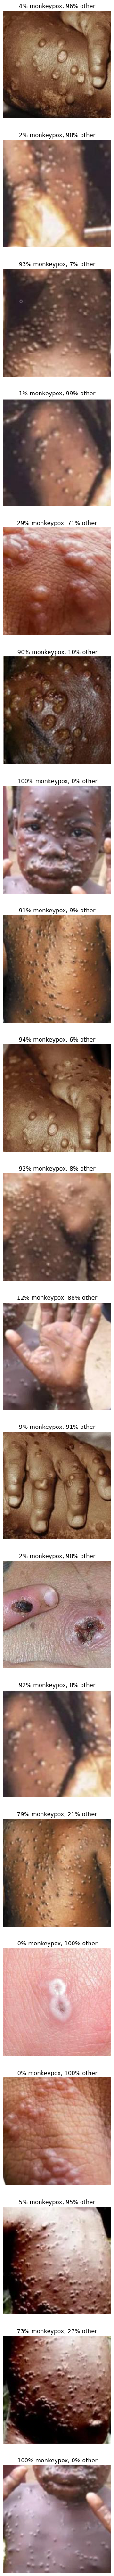

In [17]:
fig, axs = plt.subplots(len(mon_list), 1, figsize=(150, 100))
for i, img in enumerate(mon_list):
    ax = axs[i]
    ax.axis('off')
    ax.set_title("{:.0f}% monkeypox, {:.0f}% other".format(100*pred_probs[i,0],
                                                            100*pred_probs[i,1]))
    ax.imshow(img)

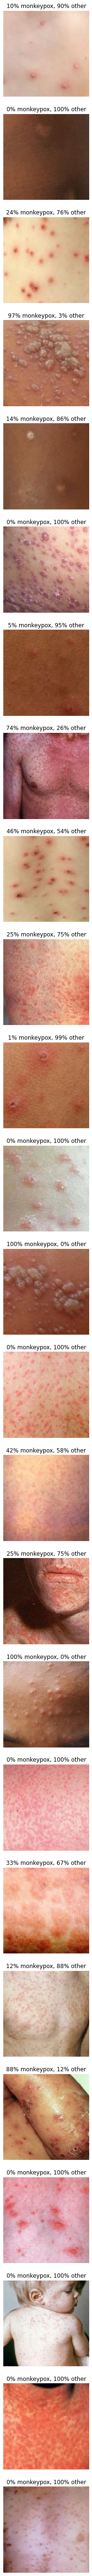

In [18]:
fig, axs = plt.subplots(len(oth_list), 1, figsize=(150, 100))
for i, img in enumerate(oth_list):
    ax = axs[i]
    ax.axis('off')
    ax.set_title("{:.0f}% monkeypox, {:.0f}% other".format(100*pred_probs2[i,0],
                                                            100*pred_probs2[i,1]))
    ax.imshow(img)